In [1]:
#importing the libraries
#Here are main goal is to understand more about data
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.special import boxcox1p #we have use boxcox1p which adds 1 to the zero value to make it positive overcome boxcox previous version
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import mean
from numpy import std

import scipy
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

*EDA*

In [2]:
df= pd.read_csv('/content/sample_data/Coursework_1_data.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#checking dtype of all columns
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
# checking the shape of datasets
df.shape

(12330, 18)

In [ ]:
#checking for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**univariate analysis**

In [ ]:
#univariate analysis, it is analysis of one variable ie by itself
col_names= list(df.columns)
col_names

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [ ]:
df.Administrative.value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

UNIVARIATE ANALYSIS FOR Administrative


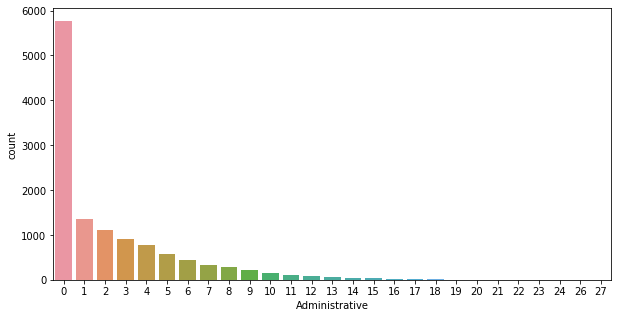

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Administrative')
plt.figure(figsize = (10,5))
sea.countplot(x='Administrative', data=df)

- Number of pages visited by the visitor about account management
- It seems very less people visits the page

In [ ]:
# len(df.Administrative_Duration.value_counts())
df.Administrative_Duration.value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64

UNIVARIATE ANALYSIS FOR Administrative_Duration


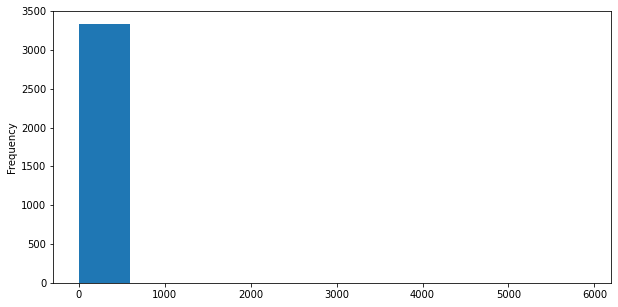

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Administrative_Duration')
plt.figure(figsize = (10,5))
df.Administrative_Duration.value_counts().plot.hist()
#plt.xlabel(i)
plt.show()

- Total amount of time (in seconds) spent by the visitor on account management related pages
- The above one shows that maximum people does not spent the time there.

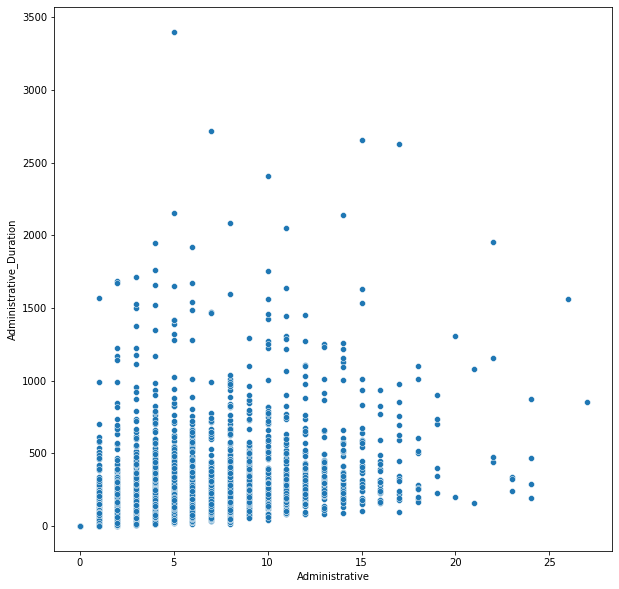

In [ ]:
plt.figure(figsize=(10,10))
sea.scatterplot(x='Administrative', y='Administrative_Duration', data=df)

In [ ]:
df.Informational.value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

UNIVARIATE ANALYSIS FOR Informational


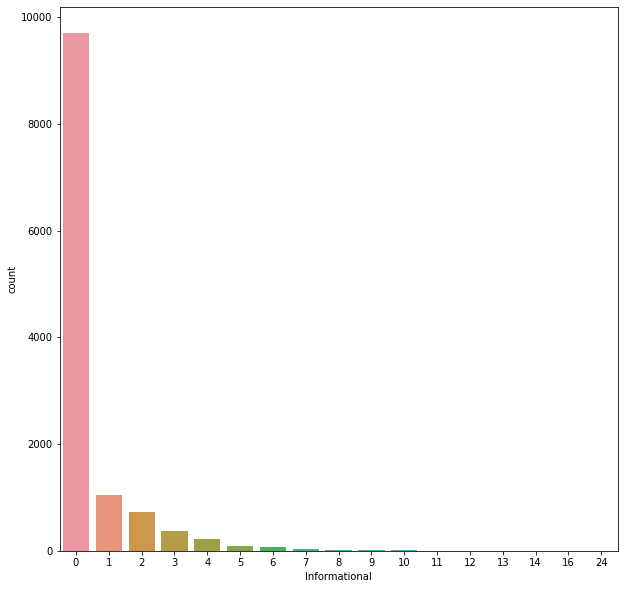

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Informational')
plt.figure(figsize=(10,10))
sea.countplot(x='Informational', data=df)

- Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site
- People generally does not visit the informational related page


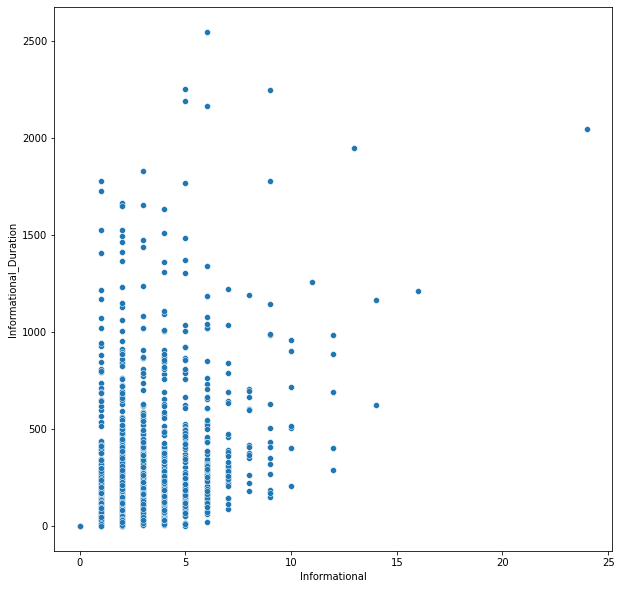

In [ ]:
plt.figure(figsize=(10,10))
sea.scatterplot(x='Informational', y='Informational_Duration', data=df)

In [3]:
df.ProductRelated.value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

UNIVARIATE ANALYSIS FOR ProductRelated


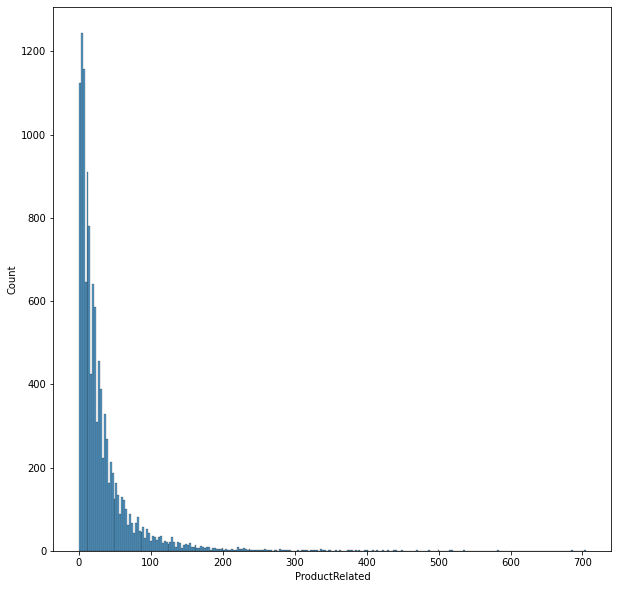

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'ProductRelated')
plt.figure(figsize=(10,10))
# sea.countplot(x='ProductRelated', data=df)
sea.histplot(x='ProductRelated', data=df)

- ProductRelated: Number of pages visited by visitor about product related pages
- Maximum visitor does not gone to the product related pages or any pages in website but most of the people have visited productRelated Pages than the Informational or Administerial pages

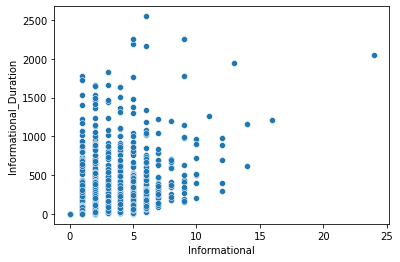

In [ ]:

sea.scatterplot(x='Informational', y='Informational_Duration', data=df)

In [ ]:
df.BounceRates.value_counts()

0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: BounceRates, Length: 1872, dtype: int64

UNIVARIATE ANALYSIS FOR BounceRates


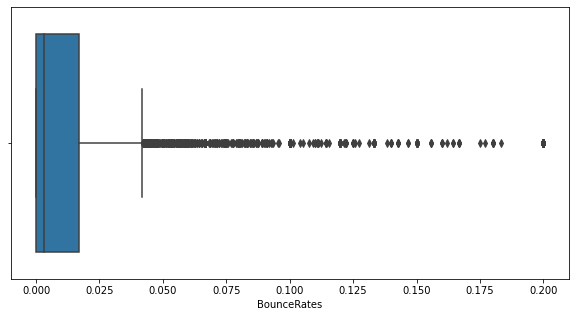

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'BounceRates')
plt.figure(figsize = (10,5))
# df.BounceRates.plot.hist(bins=50)
#plt.xlabel(i)
# plt.show()
sea.boxplot(x='BounceRates', data=df)

- Bounce Rate: the percentage of visitors to a particular website who navigate away from the site after viewing only one page
- Average bounce rate value of the pages visited by the visitor
- shows most people does not even visited, and only few people visited and moved out

In [ ]:
# df.ExitRates.dtypes
df.ExitRates.value_counts()

0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: ExitRates, Length: 4777, dtype: int64

UNIVARIATE ANALYSIS FOR ExitRates


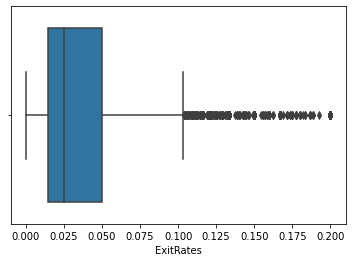

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'ExitRates')
# plt.figure(figsize = (10,5))
# df.ExitRates.plot.hist()
# #plt.xlabel(i)
# plt.show()
sea.boxplot(x='ExitRates', data=df)

- Average exit rate value of the pages visited by the visitor
- ExitRates: the percentage that were the last in the session
- shows that Bounce and Exit rates have large outliers

In [ ]:
df.PageValues.value_counts()

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

UNIVARIATE ANALYSIS FOR PageValues


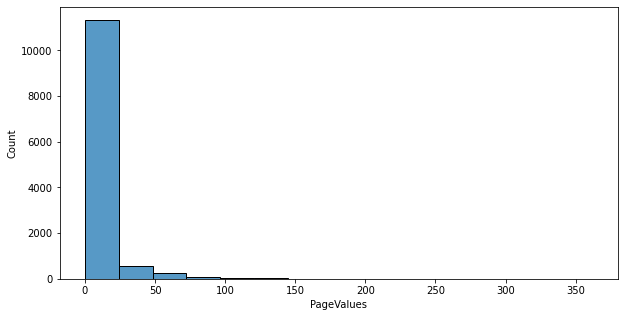

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'PageValues')
plt.figure(figsize = (10,5))
# df.PageValues.plot.hist()
# #plt.xlabel(i)
# plt.show()
# sea.boxplot(x='PageValues', data=df)
sea.histplot(x='PageValues', data=df)

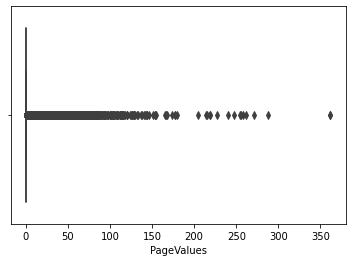

In [ ]:
sea.boxplot(x='PageValues', data=df)

- Average page value of the pages visited by the visitor
- Large outliers

In [ ]:
df.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

UNIVARIATE ANALYSIS FOR SpecialDay


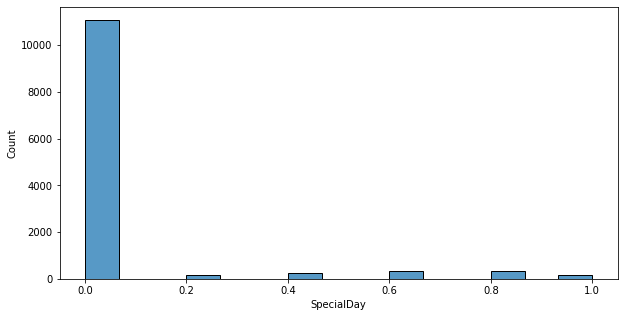

In [ ]:
from matplotlib import figure
print("UNIVARIATE ANALYSIS FOR " + 'SpecialDay')
plt.figure(figsize = (10,5))
# df.SpecialDay.plot.hist()
# #plt.xlabel(i)
# plt.show()
# sea.boxplot(x='SpecialDay', data=df)
sea.histplot(x='SpecialDay', data=df)

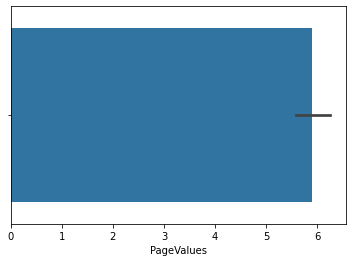

In [ ]:
sea.barplot(x='PageValues', data=df)

- Closeness of the site visiting time to a special day
- Even on special day less people visit the website.


In [ ]:
# df.Month.dtypes
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

UNIVARIATE ANALYSIS FOR Month


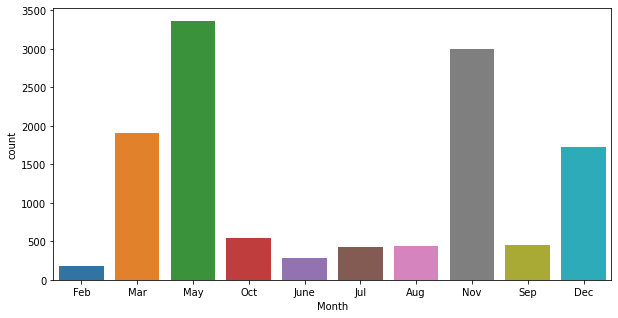

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Month')
plt.figure(figsize = (10,5))
# df.Month.value_counts().plot.bar()
#plt.xlabel(i)
sea.countplot(x='Month', data=df)
# plt.show()

- Month value of the visit date
- Shows that may, mar, and nov are the months where maximum user visited 

In [ ]:
# df.OperatingSystems.dtypes
df.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

UNIVARIATE ANALYSIS FOR OperatingSystems


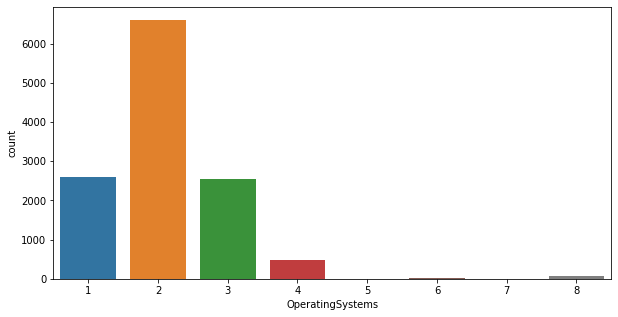

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'OperatingSystems')
plt.figure(figsize = (10,5))
# df.OperatingSystems.plot.hist()
#plt.xlabel(i)
sea.countplot(x='OperatingSystems', data=df)
# plt.show()

- Operating system of the visitor
- Shows the top 3 operating system use by the visitors(1,2,3)

In [ ]:
# df.Browser.dtypes
df.Browser.value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

UNIVARIATE ANALYSIS FOR Browser


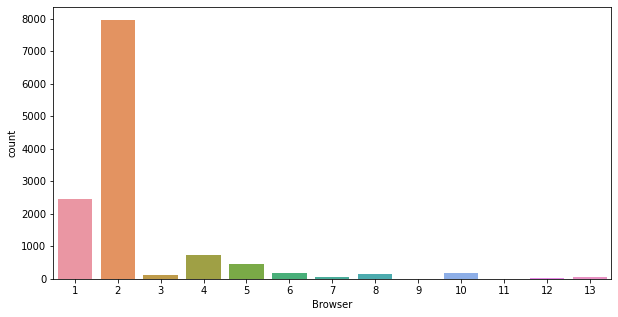

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Browser')
plt.figure(figsize = (10,5))
# df.Browser.plot.hist()
# #plt.xlabel(i)
# plt.show()
sea.countplot(x='Browser', data=df)

- Browser of the visitor
- Below shows that majority of browsers used by visitors are (1,2,4)

In [ ]:
# df.Region.dtypes
df.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

UNIVARIATE ANALYSIS FOR Region


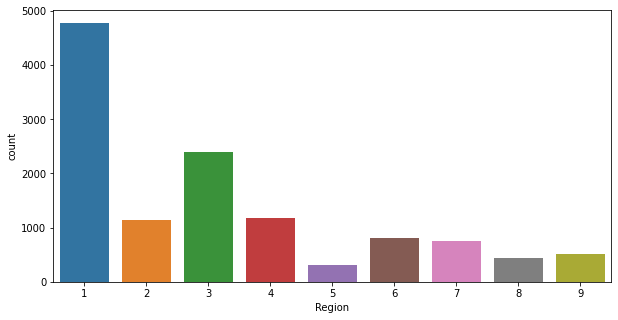

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Region')
plt.figure(figsize = (10,5))
# df.Region.plot.hist()
# #plt.xlabel(i)
sea.countplot(x='Region', data=df)
# plt.show()

- Geographic region from which the session has been started by the visitor
- Below we get to know that here is 9 different Regions from where visitor visits

- Can be any of the belows
Americas (North America, South America, Central America, Caribbean)
Asia Pacific (Central & South Asia, Northeastern Asia, Southeastern Asia, Australia and Oceania)
Europe (Northern Europe, Southern Europe, Eastern Europe, Western Europe)
Middle East/Africa (Middle East, Northern Africa, Southern Africa)

In [ ]:
# df.TrafficType.dtypes
df.TrafficType.value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

UNIVARIATE ANALYSIS FOR TrafficType


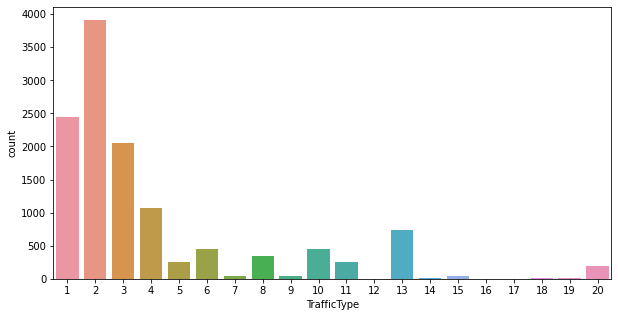

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'TrafficType')
plt.figure(figsize = (10,5))
# df.TrafficType.plot.hist()
# #plt.xlabel(i)
# plt.show()
sea.countplot(x='TrafficType', data=df)

- Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
- Below shows how different traffic sources occurs in visitors way to the websites

UNIVARIATE ANALYSIS FOR VisitorType


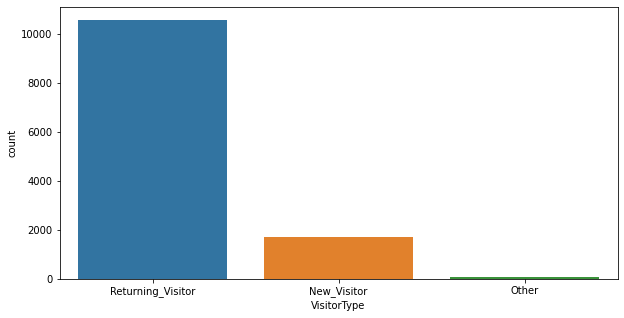

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'VisitorType')
plt.figure(figsize = (10,5))
# df.VisitorType.value_counts().plot.bar()
# #plt.xlabel(i)
# plt.show()
sea.countplot(x='VisitorType', data=df)

- Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’
- Below one shows that the majority of visitors are the "Returning Visitor"

UNIVARIATE ANALYSIS FOR Weekend


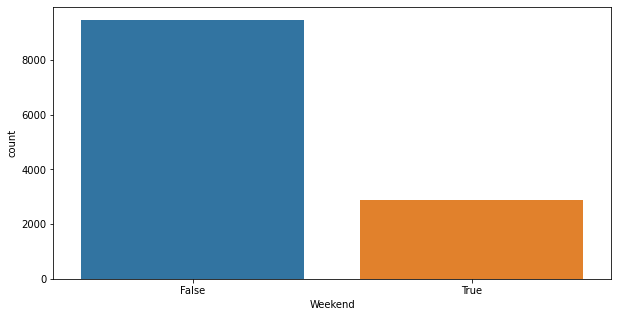

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Weekend')
plt.figure(figsize = (10,5))
# df.Weekend.value_counts().plot.bar()
# # sea.countplot(df.Weekend)
# #plt.xlabel(i)
# plt.show()
sea.countplot(x='Weekend', data=df)

- Boolean value indicating whether the date of the visit is weekend
- Below one shows that the weekend is highly imbalanced(ie False is majority and True is minority)

UNIVARIATE ANALYSIS FOR Revenue


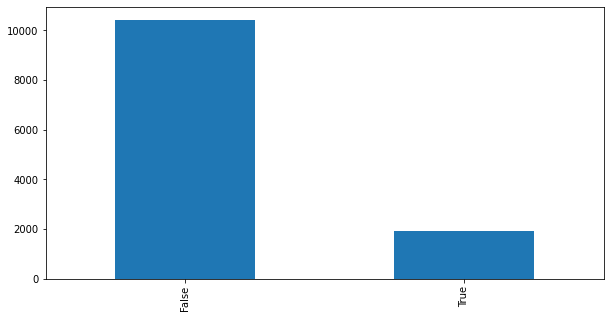

In [ ]:
print("UNIVARIATE ANALYSIS FOR " + 'Revenue')
plt.figure(figsize = (10,5))
df.Revenue.value_counts().plot.bar()
#plt.xlabel(i)
plt.show()

- Class label indicating whether the visit has been finalized with a transaction
- Its a target variable, Buy or Not has to be predicted
- Imbalanced data(False majority, True minority)

**Bivariate and multivariate Analysis**

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Administrative vs Revenue

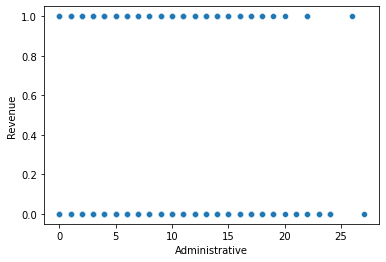

In [ ]:
sea.scatterplot(x='Administrative', y='Revenue', data=df)

Administrative_Duration vs Revenue

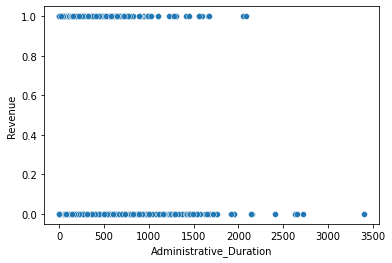

In [ ]:
sea.scatterplot(x='Administrative_Duration', y='Revenue', data=df)

Administrative vs Administrative_Duration vs Revenue

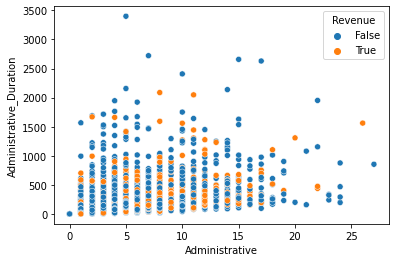

In [ ]:
sea.scatterplot(x='Administrative', y='Administrative_Duration', hue='Revenue', data=df)


- From the above we get to know that Administrative with its duration shows that everytime someone visits page does not mean they buy thinks.
- People are spending much time in administrative page to know about it, to make the deal.

Informational vs Revenue

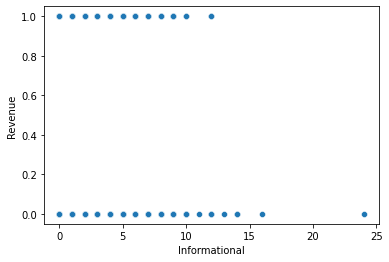

In [ ]:
sea.scatterplot(x='Informational', y='Revenue', data=df)

Informational_Duration vs Revenue

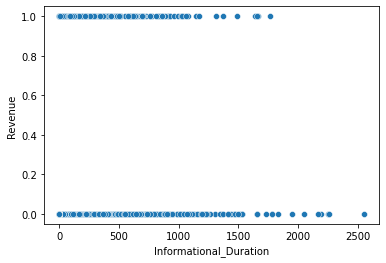

In [ ]:
sea.scatterplot(x='Informational_Duration', y='Revenue', data=df)

Informational vs Informational_Duration vs Revenue

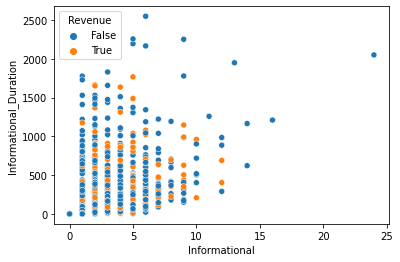

In [ ]:
sea.scatterplot(x='Informational', y='Informational_Duration', hue='Revenue', data=df)

By above Informational, Informational_Duration, Revenue, Insights we get:
- People spending time on reading informational page and then deciding to buy things or not.

ProductRelated vs Revenue

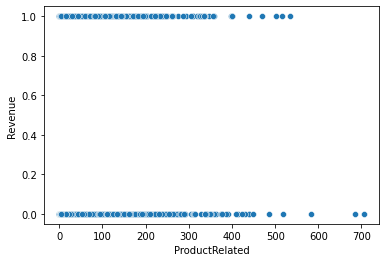

In [ ]:
sea.scatterplot(x='ProductRelated', y='Revenue', data=df)

ProductRelated_Duration vs Revenue

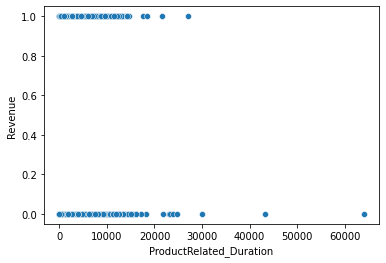

In [ ]:
sea.scatterplot(x='ProductRelated_Duration', y='Revenue', data=df)

ProductRelated vs ProductRelated_Duration vs Revenue

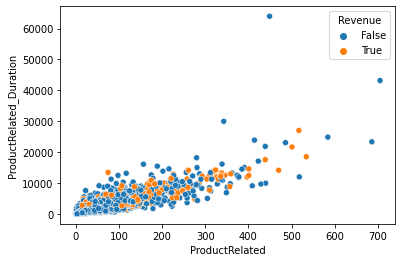

In [ ]:
sea.scatterplot(x='ProductRelated', y='ProductRelated_Duration', hue='Revenue', data=df)

- Many People Have visited ProductRelated Pages, Spent good ammount of time there.
- 0-400 ProductRelated Count, ProductRelatedDuration is high and Revenue generated is high in 100-350. 
- There is linear relationship between ProductRelatedDuration and ProductRelated

BounceRate vs Revenue

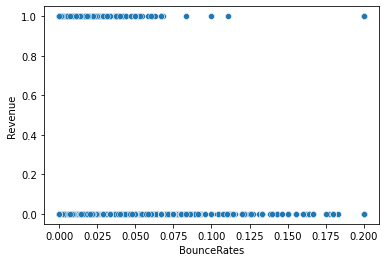

In [ ]:
sea.scatterplot(x='BounceRates', y='Revenue', data=df)

ExitRates vs Revenue

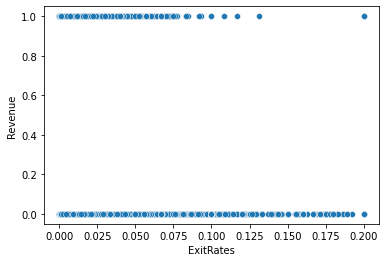

In [ ]:
sea.scatterplot(x='ExitRates', y='Revenue', data=df)

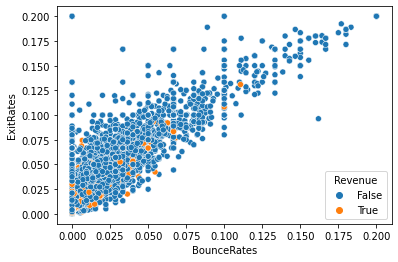

In [ ]:
sea.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=df)

- High BounceRates and ExitRates have no revenue generated

PageValues vs Revenue

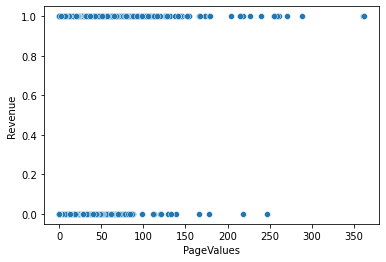

In [ ]:
sea.scatterplot(x='PageValues', y='Revenue', data=df)

- give you an idea of which page in your site contributed more to your site's revenue
- Pagevalues shows that it is highly possible that visitor will purchased(True) ie revenue will be generated.  

specialDay vs Revenue

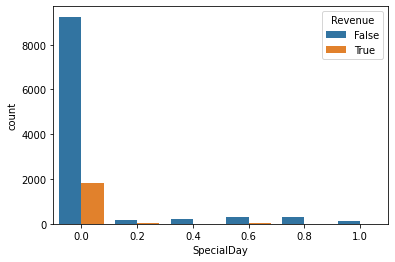

In [ ]:
sea.countplot(x='SpecialDay', hue='Revenue', data=df)

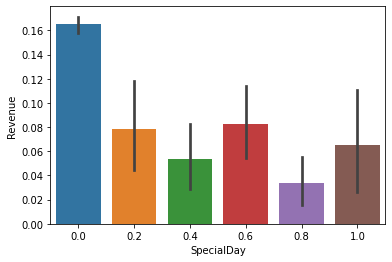

In [ ]:
sea.barplot(x='SpecialDay', y='Revenue', data=df)

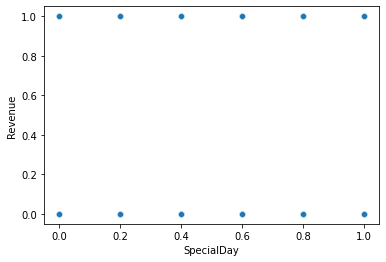

In [ ]:
sea.scatterplot(x='SpecialDay', y='Revenue', data=df)

Month vs Revenue


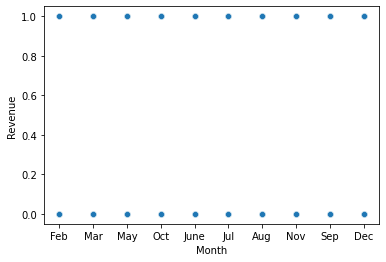

In [ ]:
sea.scatterplot(x='Month', y='Revenue', data=df)

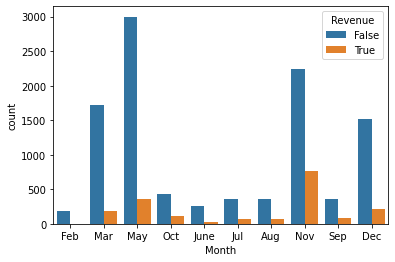

In [ ]:
sea.countplot(x='Month', hue='Revenue', data=df)

- Revenue generated more in month of nov
- Top 3 month where the revenue generated more is nov, mar, dec
- From Month Column 2 months(ie Jan and Apr) are not present

['OperatingSystems', 'Browser', 'Region', 'TrafficType'] vs Revenue

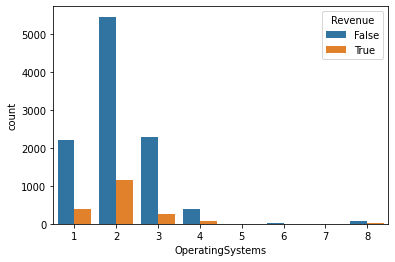

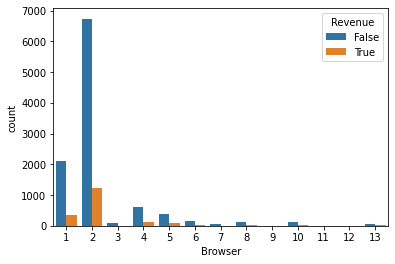

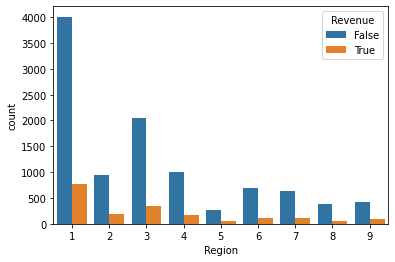

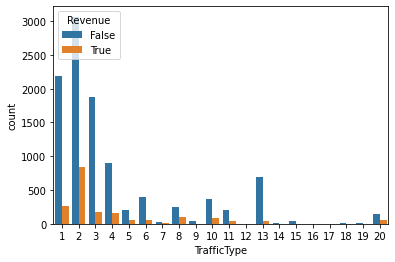

In [ ]:
# sea.scatterplot(x='OperatingSystems', y='Revenue', data=df)
for i in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
  plt.figure()
  sea.countplot(x=i, hue='Revenue', data=df)

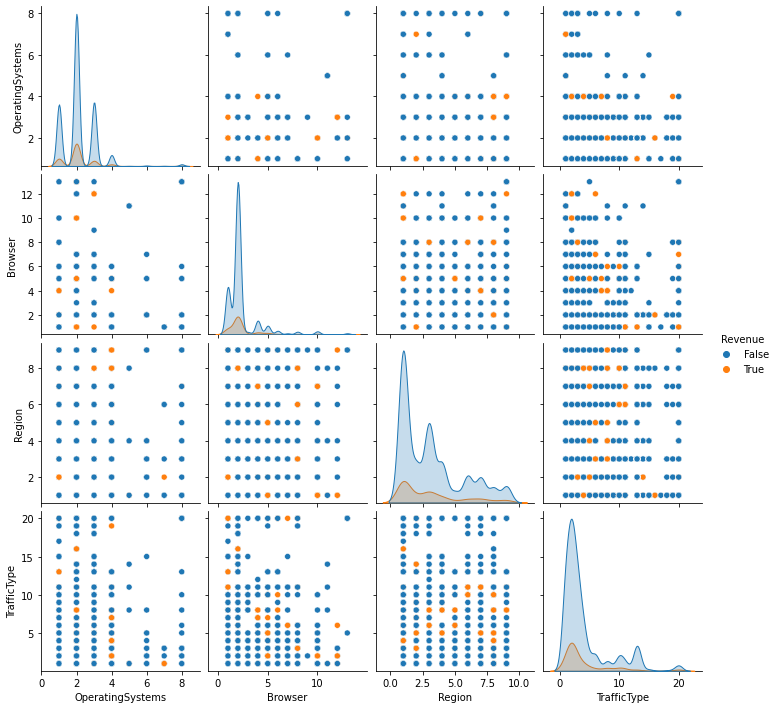

In [ ]:
sea.pairplot(df.loc[:,['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue']],hue='Revenue')

- Top 3 OS from where more revenue got generated are 1,2,3 
- Top Browser are 1, 2, others from where Revenue generates.
- Top Regions are 1,3,2, others from where Revenue generates.
- Top TrafficType are 2, 1, 4, others from where Revenue generates

VisitorType vs Revenue

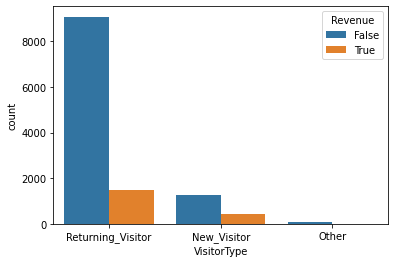

In [ ]:
sea.countplot(x='VisitorType', hue='Revenue', data=df)

- High Chance of people who are returning(Returning_Visitor) having more chance of buying thing.

Weekend vs Revenue

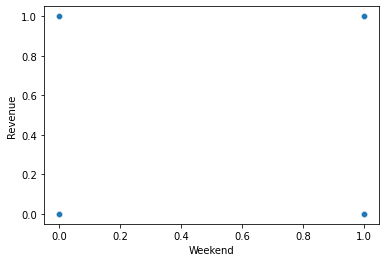

In [ ]:
sea.scatterplot(x='Weekend', y='Revenue', data=df)

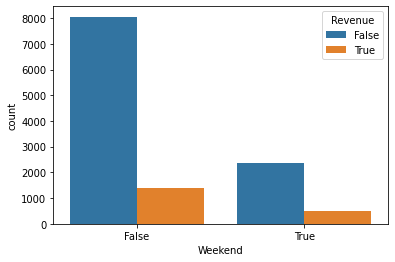

In [ ]:
sea.countplot(x='Weekend', hue='Revenue', data=df)

- Shows People are not buying stuffs on weekends

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df1=pd.get_dummies(df)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [ ]:
le= LabelEncoder()
df1['Revenue']=le.fit_transform(df1['Revenue'])
df1['Weekend']=le.fit_transform(df1['Weekend'])
df1.head() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
df1.Weekend.value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

- Applied onehotencoding on object dtype and labelencoding on bool dtype(due to categorical data)

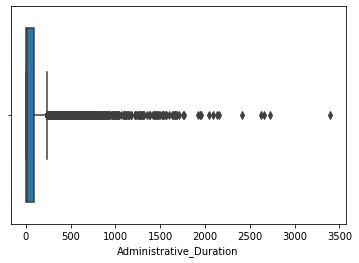

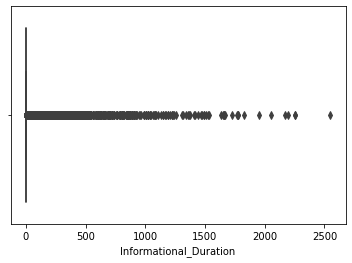

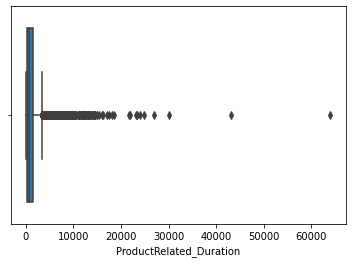

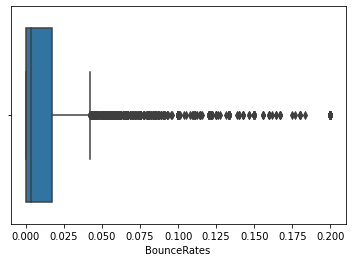

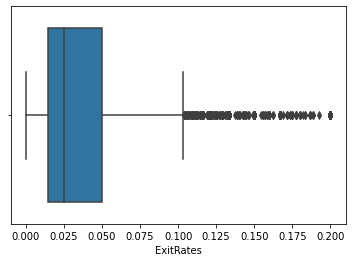

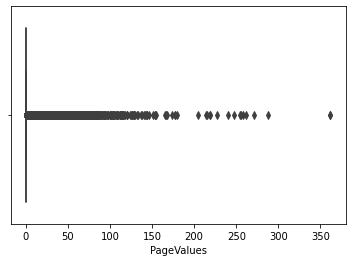

In [ ]:
numerical_columns__with_outliers=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for i in numerical_columns__with_outliers:
  plt.figure()
  sea.boxplot(x=i, data=df1)

- we have a lot of outliers, if you notice informational_duration and page values, <u>they don't have any distribution</u> and if you remove the outliers there will be one value left in it. So except that two features, we are removing the outliers via IQR method.


To know Everything about the outliers and how to deal with it .

**must see**: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [ ]:
# df['age'].replace(df.age>75,0,inplace=True)
# instead of removing ouliers
# median = df.loc[df['Age']<75, 'Age'].median()
# df.loc[df.Age > 75, 'Age'] = np.nan
# df.fillna(median,inplace=True)

In [ ]:
#have found out the outliers numbers
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration']
out_per=[]
for i in numerical_features:
  print('\n',i)
  # calculate summary statistics
  data_mean, data_std = mean(df1[i]), std(df1[i])
  # identify outliers
  cut_off = data_std * 3
  lower, upper = data_mean - cut_off, data_mean + cut_off
  # identify outliers
  outliers = [x for x in df1[i] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  # remove outliers
  outliers_removed = [x for x in df1[i] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))


 BounceRates
Identified outliers: 708
Non-outlier observations: 11622

 ExitRates
Identified outliers: 713
Non-outlier observations: 11617

 Administrative_Duration
Identified outliers: 232
Non-outlier observations: 12098

 ProductRelated_Duration
Identified outliers: 219
Non-outlier observations: 12111


In [ ]:
# df['age'].replace(df.age>75,0,inplace=True)
# instead of removing ouliers
# median = df.loc[df['Age']<75, 'Age'].median()
# df.loc[df.Age > 75, 'Age'] = np.nan
# df.fillna(median,inplace=True)

In [ ]:
#Treating the outliers
for i in numerical_features:
  # calculate interquartile range
  print('\n',i)
  q25, q75 = np.percentile(df1[i], 25), np.percentile(df1[i], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  # identify outliers
  outliers = [x for x in df1[i] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #replacing the lower and upper values with the required value
  df1[i].clip(q25, q75)

  # #replacing less than lower value with the lower
  # df1[i].replace(df1[i]<lower,lower,inplace=True)
  # #replacing greator then upper value with the upper 
  # df1[i].replace(df1[i]>upper,upper,inplace=True)
  # remove outliers
  # outliers_removed = [x for x in df1[i] if x >= lower and x <= upper]
  # print('Non-outlier observations: %d' % len(outliers_removed))
  # filter = (df1[i] >= lower) & (df1[i] <= upper)
  # df1=df1.loc[filter]


 BounceRates
Percentiles: 25th=0.000, 75th=0.017, IQR=0.017
Identified outliers: 1551

 ExitRates
Percentiles: 25th=0.014, 75th=0.050, IQR=0.036
Identified outliers: 1099

 Administrative_Duration
Percentiles: 25th=0.000, 75th=93.256, IQR=93.256
Identified outliers: 1172

 ProductRelated_Duration
Percentiles: 25th=184.137, 75th=1464.157, IQR=1280.020
Identified outliers: 961


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

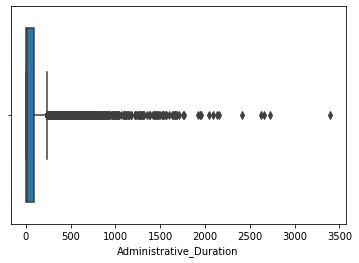

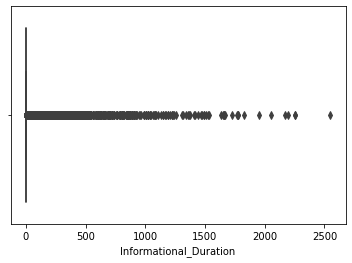

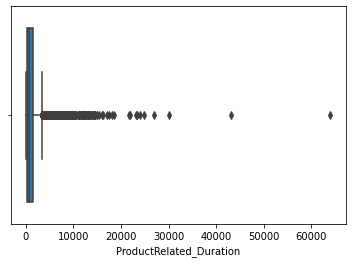

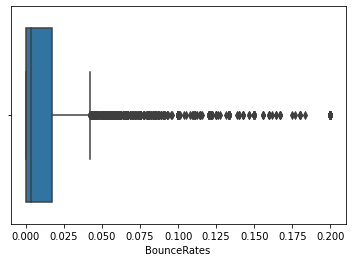

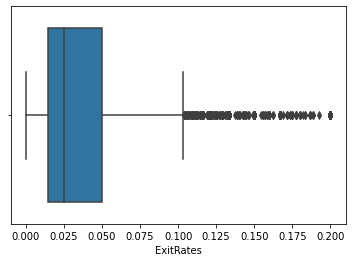

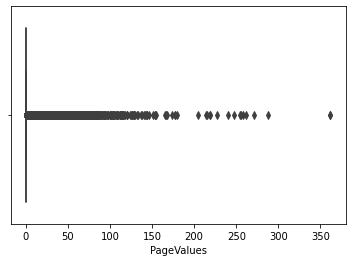

In [ ]:
numerical_columns_without_outliers=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for i in numerical_columns_without_outliers:
  plt.figure()
  sea.boxplot(x=i, data=df1)

In [ ]:
df1[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']].shape

(12330, 6)

In [ ]:
x=df1.drop('Revenue', axis=1)
y=df1['Revenue']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20)

**MODELING**

Applying All Classification models to know which one giving the best accuracy after doing data preprocessing.

In [ ]:
# #svm
# svm=SVC()
# svm.fit(x,y)
# svm.score(x_train, y_train),svm.score(x_test, y_test)
# # Naive Bayes
# nb = GaussianNB()
# nb.fit(x,y)
# nb.score(x_train, y_train), nb.score(x_test, y_test)
# #knn
# knn = KNeighborsClassifier()
# knn.fit(x,y)
# knn.score(x_train, y_train),knn.score(x_test, y_test)
# dt= DecisionTreeClassifier()
# dt.fit(x,y)
# dt.score(x_train, y_train),dt.score(x_test, y_test)
# #RandomForest
# rdf= RandomForestClassifier()
# rdf.fit(x,y)
# rdf.score(x_train, y_train),rdf.score(x_test, y_test)
# ab= AdaBoostClassifier()
# ab.fit(x,y)
# ab.score(x_train, y_train),ab.score(x_test, y_test)

In [ ]:
#svm
svm=SVC()
svm.fit(x,y)

SVC()

In [ ]:
svm.score(x_train, y_train),svm.score(x_test, y_test)

(0.8638310019982872, 0.8601598173515982)

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x,y)

GaussianNB()

In [ ]:
nb.score(x_train, y_train), nb.score(x_test, y_test)

(0.7893234370539538, 0.7950913242009132)

In [ ]:
#knn
knn = KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier()

In [ ]:
knn.score(x_train, y_train),knn.score(x_test, y_test)

(0.8973736797031117, 0.8926940639269406)

In [ ]:
# DecisionTree
dt= DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train, y_train),dt.score(x_test, y_test)

(1.0, 1.0)

In [ ]:
#RandomForest
rdf= RandomForestClassifier()
rdf.fit(x,y)

RandomForestClassifier()

In [ ]:
rdf.score(x_train, y_train),rdf.score(x_test, y_test)

(1.0, 1.0)

In [ ]:
#AdaBoost
ab= AdaBoostClassifier()
ab.fit(x,y)

AdaBoostClassifier()

In [ ]:
ab.score(x_train, y_train),ab.score(x_test, y_test)

(0.8953753925206965, 0.8921232876712328)

Normalizing

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

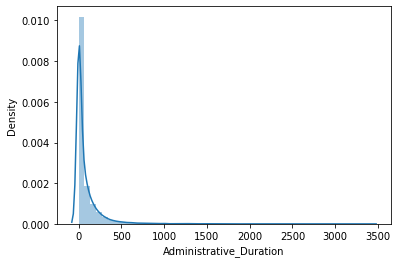

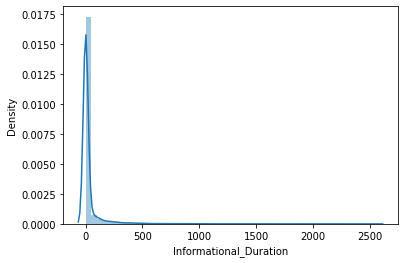

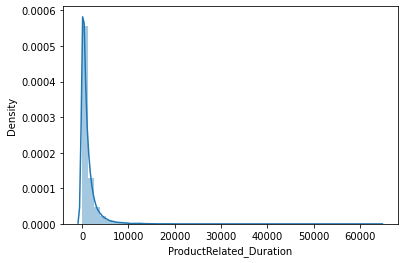

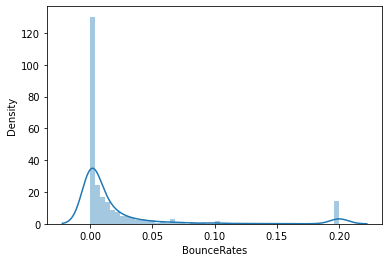

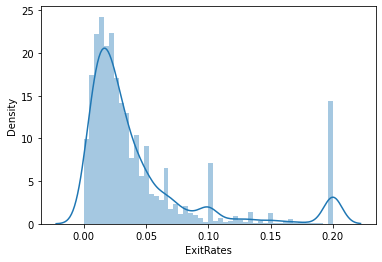

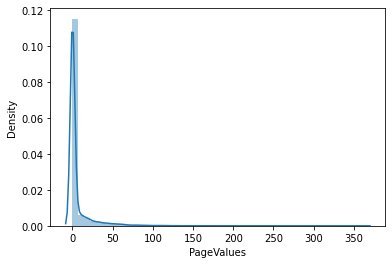

In [ ]:
numerical_columns=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for i in numerical_columns:
  plt.figure()
  sea.distplot(df1[i])

From above get to know that our data is not normalized, so to normalized it, we will use boxcox.

 for more see: https://www.kaggle.com/code/rtatman/data-cleaning-challenge-scale-and-normalize-data 

Note method 'yeo-johnson' is used because it works with both positive and negative values. Method 'box-cox' will raise error: ValueError: The Box-Cox transformation can only be applied to strictly positive data.

Transform data(numerical) into normal distribution use: 

- Boxcox(does not work on -ve or 0 use only for +ve value) 
- To overcome boxcox we can use boxcox1p which uses for -ve and +ve values but not for float
- To overcome boxcox1p we can use yeo-johnson which can apply for float and int.
- We'll use log here as we have excess zero, also add 0.5 just to avoid nan values in log.

Note: df['Administrative'].values+0.5 #u can use .to_numpy() convert to numpy array
Note: 

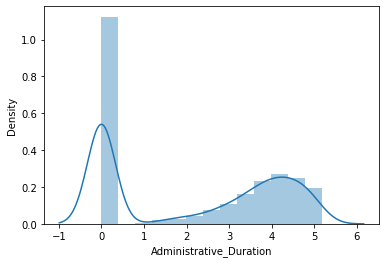

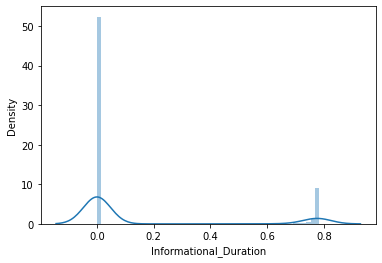

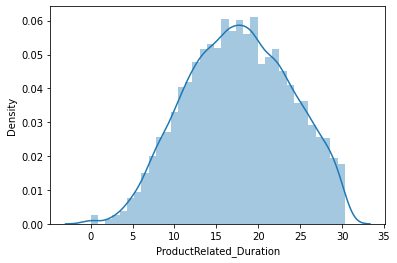

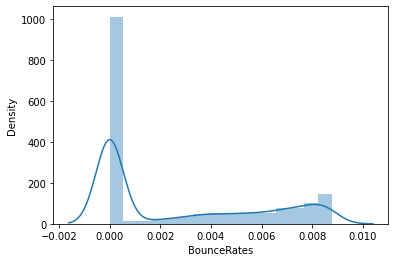

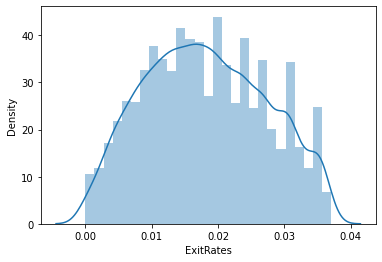

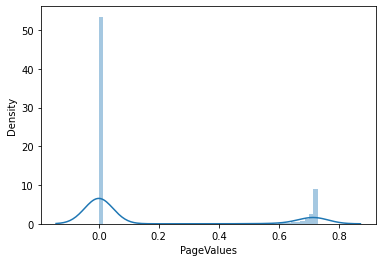

In [ ]:
# from scipy.stats.morestats import boxcox
# #Boxcox1pTransformation
# numerical_columns=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
# # lam=0.15
# for x in numerical_columns:
#     pt = PowerTransformer(method='yeo-johnson')
#     pt.fit(df1[x].to_frame())
#     lam=pt.lambdas_[-1]
#     df1[x] = boxcox1p(df1[x], lam)
#     plt.figure()
#     sea.distplot(df1[x])
# # df1.head()

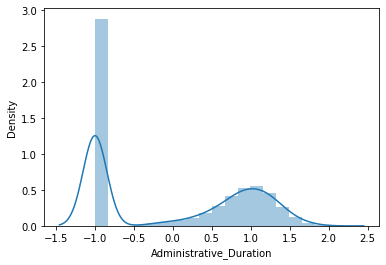

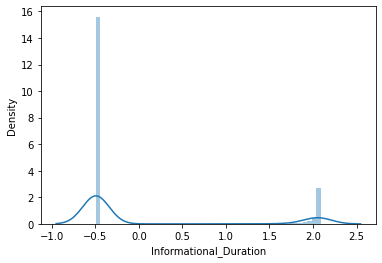

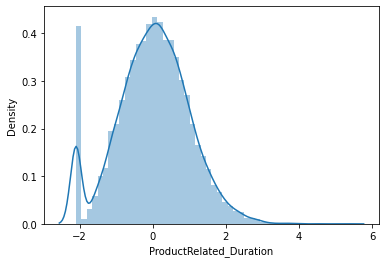

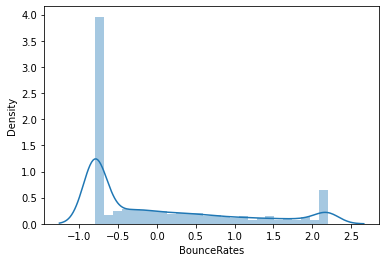

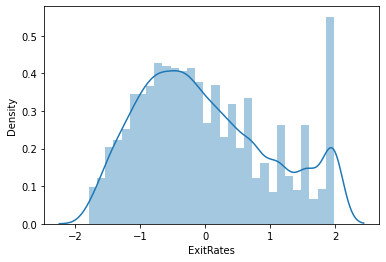

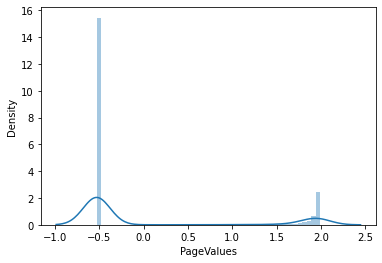

In [ ]:
#Yeo Transformation
numerical_columns=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for x in numerical_columns:
    pt = PowerTransformer(method='yeo-johnson')
    df1[x] = pt.fit_transform(df1[x].to_frame())
    plt.figure()
    sea.distplot(df1[x])
# df1.head()

In [ ]:
#log transformation
# numerical_columns=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
# for x in numerical_columns:
#     df1[x]= np.log(df1[x].values+0.5)
# df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
4,0,-0.693147,0,-0.693147,10,6.442540,-0.653926,-0.597837,-0.693147,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0,-0.693147,0,-0.693147,19,5.041595,-0.662057,-0.645193,-0.693147,0.0,...,0,0,0,0,0,0,0,0,0,1
9,0,-0.693147,0,-0.693147,3,6.604621,-0.693147,-0.649662,-0.693147,0.4,...,0,0,0,0,0,0,0,0,0,1
10,0,-0.693147,0,-0.693147,3,5.980151,-0.693147,-0.567984,-0.693147,0.0,...,0,0,0,0,0,0,0,0,0,1
11,0,-0.693147,0,-0.693147,16,6.011880,-0.656333,-0.642771,-0.693147,0.4,...,0,0,0,0,0,0,0,0,0,1


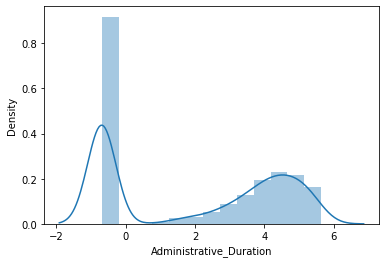

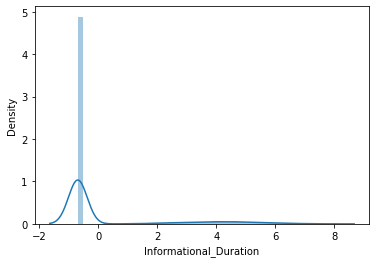

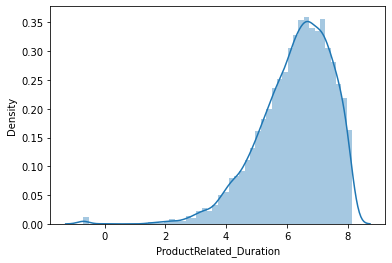

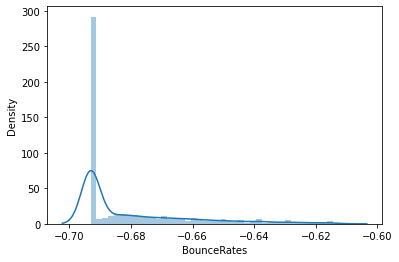

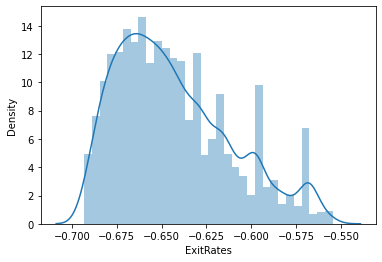

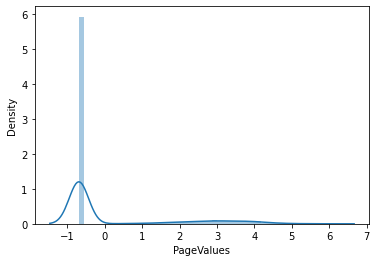

In [ ]:
for i in ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']:
  plt.figure()
  sea.distplot(df1[i])

Here After transformation into normal distribution almost all methods giving same distribution so we will go with the yeo method. 

In [ ]:
print('All Columns(Attribute) Names:\n', df1.columns.shape)#columns name
print('Number of Columns(Attribute) Present: ', len(df1.columns))#number of columns in df
print('Columns With Null Values:\n', df1.isnull().sum())#check the null values in all columns
print('Length of Values Present in DF: ', len(df1))
print('Count of values in columns:\n', df1.count())

All Columns(Attribute) Names:
 (29,)
Number of Columns(Attribute) Present:  29
Columns With Null Values:
 Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Weekend                          0
Revenue                          0
Month_Aug                        0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep          

In [ ]:
df1.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
Administrative,1.000000,0.942114,0.375771,0.365944,0.463478,0.399814,-0.302165,-0.420068,0.286230,-0.123067,...,0.013959,-0.007363,-0.047231,-0.072793,0.036579,0.110972,0.079574,0.098813,-0.023884,-0.091187
Administrative_Duration,0.942114,1.000000,0.348353,0.341117,0.433344,0.398078,-0.315068,-0.435836,0.280905,-0.132816,...,0.013739,-0.016478,-0.042845,-0.071228,0.026647,0.117840,0.080947,0.131949,-0.023428,-0.123759
Informational,0.375771,0.348353,1.000000,0.929780,0.365422,0.302368,-0.141625,-0.199740,0.180146,-0.054484,...,0.006262,0.005605,-0.036326,-0.037080,0.070612,0.005982,0.009820,-0.055394,-0.025573,0.060294
Informational_Duration,0.365944,0.341117,0.929780,1.000000,0.356960,0.299134,-0.142375,-0.205284,0.189515,-0.054835,...,0.008249,-0.003117,-0.024486,-0.031996,0.057147,0.013737,0.006233,-0.049471,-0.025146,0.054390
ProductRelated,0.463478,0.433344,0.365422,0.356960,1.000000,0.854800,-0.492104,-0.633291,0.285587,-0.015518,...,0.019939,-0.000304,-0.117566,-0.043069,0.150983,0.021528,0.016972,-0.098349,-0.072640,0.113462
ProductRelated_Duration,0.399814,0.398078,0.302368,0.299134,0.854800,1.000000,-0.726062,-0.783117,0.274260,-0.036367,...,0.002142,-0.025255,-0.072608,-0.043575,0.113852,0.022638,0.020189,-0.034125,-0.061600,0.047940
BounceRates,-0.302165,-0.315068,-0.141625,-0.142375,-0.492104,-0.726062,1.000000,0.900944,-0.179943,0.083003,...,0.011801,0.042715,-0.007230,0.062418,-0.035261,-0.046059,-0.040156,-0.146945,0.025577,0.137946
ExitRates,-0.420068,-0.435836,-0.199740,-0.205284,-0.633291,-0.783117,0.900944,1.000000,-0.259921,0.112336,...,0.010148,0.049580,0.012212,0.075613,-0.058694,-0.063460,-0.051359,-0.193044,0.033364,0.181276
PageValues,0.286230,0.280905,0.180146,0.189515,0.285587,0.274260,-0.179943,-0.259921,1.000000,-0.073639,...,-0.006093,-0.021170,-0.062631,-0.002776,0.050938,0.046721,0.023763,0.050859,0.008813,-0.051904
SpecialDay,-0.123067,-0.132816,-0.054484,-0.054835,-0.015518,-0.036367,0.083003,0.112336,-0.073639,1.000000,...,-0.060910,-0.049434,-0.136729,0.479945,-0.181180,-0.069004,-0.062069,-0.085324,-0.026632,0.089867


**Modeling**

In [ ]:
x1=df1.drop('Revenue', axis=1)
y1=df1['Revenue']

In [ ]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1,y1, test_size=0.20)

In [ ]:
#svm
svm1=SVC()
svm1.fit(x1_train,y1_train)

SVC()

In [ ]:
svm1.score(x1_train, y1_train),svm.score(x1_test, y1_test)

(0.9002433090024331, 0.8414436334144363)

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x1_train,y1_train)

GaussianNB()

In [ ]:
nb.score(x1_train, y1_train), nb.score(x1_test, y1_test)

(0.6653487429034874, 0.6747769667477697)

In [ ]:
#knn
knn = KNeighborsClassifier()
knn.fit(x1_train,y1_train)

KNeighborsClassifier()

In [ ]:
knn.score(x1_train, y1_train),knn.score(x1_test, y1_test)

(0.922242497972425, 0.8933495539334956)

In [ ]:
# Decision Tree
dt= DecisionTreeClassifier()
dt.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x1_train, y1_train),dt.score(x1_test, y1_test)

(1.0, 0.8503649635036497)

In [ ]:
#RandomForest
rdf= RandomForestClassifier()
rdf.fit(x1_train,y1_train)

RandomForestClassifier()

In [ ]:
rdf.score(x1_train, y1_train),rdf.score(x1_test, y1_test)

(1.0, 0.902676399026764)

In [ ]:
#AdaBoost
ab= AdaBoostClassifier()
ab.fit(x1_train,y1_train)

AdaBoostClassifier()

In [ ]:
ab.score(x1_train, y1_train),ab.score(x1_test, y1_test)

(0.892639902676399, 0.8901054339010543)

**Hyperparameter Tuning**

We will use randomizedsearchcv

Decision Tree

In [ ]:
# Decision Tree
dt= DecisionTreeClassifier()

In [ ]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],#This indicates how deep the tree can be
              "max_features": range(1, 11),#max_features represents the number of features to consider when looking for the best split
              "min_samples_split": range(2, 11),#represents the minimum number of samples required to split an internal node
              "criterion": ["gini", "entropy"]}# it represents which to use gini or entropy

In [ ]:
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5)# function attribute checkout sklearn doc

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train, y_train),dt.score(x_test, y_test)

(1.0, 0.8704337899543378)

RandomForestClassifier

In [ ]:
#RandomForest
rdf= RandomForestClassifier()

In [ ]:
param_dist = {
'max_depth': [20,40, 60],
'max_features': range(1, 11),
"criterion": ["gini", "entropy"]
}
# n_estimators=100, criterion='gini', max_depth=5, max_features='auto', n_jobs=-1

In [ ]:
random_search_rdf = RandomizedSearchCV(rdf, param_distributions=param_dist, n_iter=10, cv=5)# function attribute checkout sklearn doc

In [ ]:
random_search_rdf.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 40, 60],
                                        'max_features': range(1, 11)})

In [ ]:
random_search_rdf.score(x_train, y_train),random_search_rdf.score(x_test, y_test)

(1.0, 0.8932648401826484)

AdaBoost

In [ ]:
param_dist = {
'learning_rate': [0.01, 0.1, 1, 10]
}

In [ ]:
ab= AdaBoostClassifier()
#base_estimator=rfc, n_estimators=100, learning_rate=0.01

In [ ]:
random_search_ab = RandomizedSearchCV(ab, param_distributions=param_dist, n_iter=10, cv=5)# function attribute checkout sklearn doc

In [ ]:
random_search_ab.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10]})

In [ ]:
random_search_ab.score(x_train, y_train),random_search_ab.score(x_test, y_test)

(0.8952326577219526, 0.8915525114155252)

SVM

In [ ]:
svm=SVC()

In [ ]:
param_dist= {
    'C': [0.1, 1,10],
    'kernel':['rbf', 'sigmoid', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

In [ ]:
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=10, cv=5)# function attribute checkout sklearn doc

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
random_search.score(x_train, y_train),random_search.score(x_test, y_test)

 KNN

In [ ]:
#knn
param_dist= {
    'n_neighbors': list(range(1,31)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)# function attribute checkout sklearn doc

In [ ]:
random_search_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]})

In [ ]:
random_search_knn.score(x_train, y_train),random_search_knn.score(x_test, y_test)

(0.894376248929489, 0.8595890410958904)

NaiveBayes

In [ ]:
#NB
param_dist= {
}

In [ ]:
nb = GaussianNB()

In [ ]:
random_search_nb = RandomizedSearchCV(nb, param_distributions=param_dist, n_iter=10, cv=5)# function attribute checkout sklearn doc

In [ ]:
random_search_nb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=GaussianNB(), param_distributions={})

In [ ]:
random_search_nb.score(x_train, y_train),random_search_nb.score(x_test, y_test)

(0.8000285469597488, 0.8007990867579908)

**Feature Importance**: Used ELI5 for feature importance.
<u>sources</u>: 
https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

https://www.kaggle.com/code/dansbecker/permutation-importance/tutorial

Here in feature importance there few methods which you can use such as LIME, SHAP, ELI5, AND YELLOWBRICK

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 9.1 MB/s 
     |████████████████████████████████| 133 kB 11.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d400e6b294941e68f244f6c07b57995506fae6bafc64c2097defe4755daa1232
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [ ]:
# to_keep
import eli5
from eli5.sklearn import PermutationImportance
from eli5 import show_prediction, show_weights

In [ ]:
#svm
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [ ]:
perm = PermutationImportance(svm)
perm.fit(x_train,y_train)

PermutationImportance(estimator=SVC())

In [ ]:
show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.0457 ± 0.0024,PageValues
0.0036 ± 0.0005,ProductRelated_Duration
0.0003 ± 0.0004,Informational_Duration
0.0003 ± 0.0003,Administrative_Duration
0 ± 0.0000,Month_Sep
0 ± 0.0000,ProductRelated
0 ± 0.0000,BounceRates
0 ± 0.0000,ExitRates
0 ± 0.0000,SpecialDay
0 ± 0.0000,OperatingSystems


In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
perm = PermutationImportance(nb)
perm.fit(x_train,y_train)

PermutationImportance(estimator=GaussianNB())

In [ ]:
show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.0944 ± 0.0057,PageValues
0.0027 ± 0.0019,Browser
0.0025 ± 0.0008,VisitorType_Other
0.0020 ± 0.0033,ProductRelated_Duration
0.0014 ± 0.0012,Informational_Duration
0.0008 ± 0.0020,Informational
0.0006 ± 0.0023,ProductRelated
-0.0001 ± 0.0007,OperatingSystems
-0.0001 ± 0.0009,Month_June
-0.0002 ± 0.0015,Region


In [ ]:
# #knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
perm = PermutationImportance(knn)
perm.fit(x_train,y_train)

PermutationImportance(estimator=KNeighborsClassifier())

In [ ]:
show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.1047 ± 0.0023,PageValues
0.0309 ± 0.0028,ProductRelated_Duration
0.0159 ± 0.0038,Administrative_Duration
0.0097 ± 0.0015,Informational_Duration
0.0072 ± 0.0013,ProductRelated
0.0008 ± 0.0007,TrafficType
0.0004 ± 0.0004,Browser
0.0001 ± 0.0000,Month_May
0.0001 ± 0.0000,Month_Dec
0.0001 ± 0.0001,VisitorType_Returning_Visitor


In [ ]:
#Decision Tree
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
perm = PermutationImportance(dt)
perm.fit(x_train,y_train)

PermutationImportance(estimator=DecisionTreeClassifier())

In [ ]:
show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.2244 ± 0.0087,PageValues
0.0720 ± 0.0033,ProductRelated_Duration
0.0674 ± 0.0033,BounceRates
0.0653 ± 0.0040,Administrative
0.0581 ± 0.0035,Month_Nov
0.0539 ± 0.0021,ProductRelated
0.0536 ± 0.0036,Administrative_Duration
0.0532 ± 0.0039,ExitRates
0.0219 ± 0.0038,Informational
0.0199 ± 0.0023,Region


In [ ]:
# #RandomForest
rdf= RandomForestClassifier()
rdf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
perm = PermutationImportance(rdf)
perm.fit(x_train,y_train)

PermutationImportance(estimator=RandomForestClassifier())

In [ ]:
show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.2174 ± 0.0064,PageValues
0.0395 ± 0.0033,ExitRates
0.0318 ± 0.0013,ProductRelated_Duration
0.0266 ± 0.0011,ProductRelated
0.0240 ± 0.0022,Month_Nov
0.0213 ± 0.0029,BounceRates
0.0210 ± 0.0003,Administrative
0.0206 ± 0.0017,Administrative_Duration
0.0106 ± 0.0016,TrafficType
0.0093 ± 0.0010,Region


In [ ]:
#AdaBoost
ab= AdaBoostClassifier()
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
perm = PermutationImportance(ab)
perm.fit(x_train,y_train)

PermutationImportance(estimator=AdaBoostClassifier())

In [ ]:
show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.1489 ± 0.0024,PageValues
0.0061 ± 0.0018,VisitorType_New_Visitor
0.0036 ± 0.0013,ProductRelated
0.0031 ± 0.0017,Administrative_Duration
0.0031 ± 0.0020,Month_Nov
0.0026 ± 0.0009,BounceRates
0.0015 ± 0.0007,Informational_Duration
0.0013 ± 0.0014,ProductRelated_Duration
0.0012 ± 0.0020,ExitRates
0.0006 ± 0.0007,Month_Aug


In [ ]:
x1=df1[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']]
y1=df1[['Revenue']]

In [ ]:
x1.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.996659,-0.491697,-2.096783,2.206432,1.982547,-0.529409
1,-0.996659,-0.491697,-1.074189,-0.799209,1.569866,-0.529409
2,-0.996659,-0.491697,-2.096783,2.206432,1.982547,-0.529409
3,-0.996659,-0.491697,-1.875436,1.709303,1.832073,-0.529409
4,-0.996659,-0.491697,0.057515,0.756734,0.722460,-0.529409


In [ ]:
y1.shape, x1.shape

((12330, 1), (12330, 6))

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1, test_size=0.20)

In [ ]:
#svm
svm=SVC()
svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
svm.score(x_train, y_train),svm.score(x_test, y_test)

(0.8996350364963503, 0.8775344687753447)

In [ ]:
# # Naive Bayes
nb = GaussianNB()
nb.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
nb.score(x_train, y_train), nb.score(x_test, y_test)

(0.8775344687753447, 0.8657745336577454)

In [ ]:
# #knn
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
knn.score(x_train, y_train),knn.score(x_test, y_test)

(0.9192011354420113, 0.8706407137064072)

In [ ]:
#decision tree
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(x_train, y_train),dt.score(x_test, y_test)

(0.9996958637469586, 0.8633414436334145)

In [ ]:
# #RandomForest
rdf= RandomForestClassifier()
rdf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
rdf.score(x_train, y_train),rdf.score(x_test, y_test)

(0.9996958637469586, 0.8860502838605029)

In [ ]:
#AdaBoost
ab= AdaBoostClassifier()
ab.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
ab.score(x_train, y_train),ab.score(x_test, y_test)

(0.8964922952149229, 0.8795620437956204)

In [ ]:
#it is a correlated function which helps us to find the correlation between columns
#helps us to remove high correlated columns.
# def uncorrelated_features(df, threshold=0.7):
#     """
#     Returns a subset of wineDCopy columns with Pearson correlations
#     below threshold.
#     """

#     corr = df.corr()#no need .abs()
#     keep = []
#     for i in range(len(corr.iloc[:,0])):
#         above = corr.iloc[:i,i]
#         if len(keep) > 0: above = above[keep]
#         if len(above[above < threshold]) == len(above):
#             keep.append(corr.columns.values[i])

#     return df[keep]

In [ ]:
# df1= uncorrelated_features(df_copy).copy()

In [ ]:
# df1.head()

In [ ]:
# df1.replace({True:1, False:0}, inplace=True)

In [ ]:
# sea.countplot(df_copy['Revenue'])#it clearly shows the class imbalanced data

In [ ]:
'''to overcome the imbalanced data we will use upsampling.
create two different dataframe of majority and minority class '''
# majority= df1[df1['Revenue']==False]
# minority= df1[df1['Revenue']==True]
# # upsample minority class
# minority_upsampled = resample(minority, 
#                                  replace=True,    # sample with replacement
#                                  n_samples= 483, # to match majority class
#                                  random_state=42)  # reproducible results
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([minority_upsampled, majority])

'to overcome the imbalanced data we will use upsampling.\ncreate two different dataframe of majority and minority class '

In [ ]:
# df1.head()

In [ ]:
# df1.shape

In [ ]:
# X=df1.drop('Revenue', axis=1)
# Y=df1.Revenue

In [ ]:
# X.head()

In [ ]:
# Y.head()